# NLP
- You can create a vector count of all the words
- VEctor of word counts - Bag of Words
- you can use cosine similarity on the vectors to see if there is any similairites 

#### TF - IDF
- Term x within document y


In [3]:
import nltk

In [5]:
#nltk.download_shell()

In [6]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
print(len(messages))

5574


In [10]:
# A collection of text is similar to a corpus

In [11]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [13]:
messages[0]
# If you look at this the \t is a tab

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
import pandas as pd

In [15]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection", sep='\t', names=['label', 'message'])

In [17]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [21]:
#Feature engineering - add length
messages['length'] = messages['message'].apply(len)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

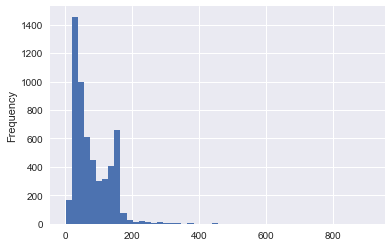

In [25]:
messages['length'].plot.hist(bins = 50)

In [26]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [30]:
messages[messages['length'] == 910]['message'].iloc[0] #add iloc of the colum to get whole

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1089b1b38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10a3bbba8>], dtype=object)

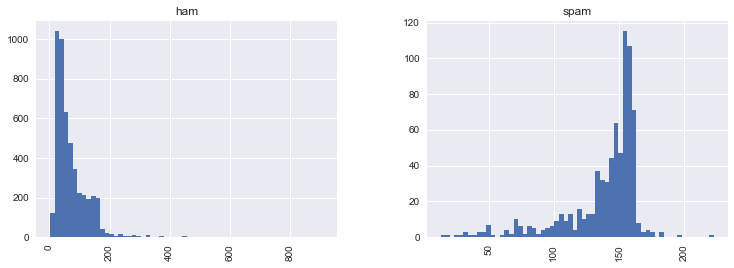

In [33]:
messages.hist(column = 'length', by='label', bins=60, figsize = (12,4))

# Splitting etc. Going through it all

In [34]:
import string

In [36]:
#mess = 'Sample message ! Notice: it has punctuation.'
#nopunc = [c for c in mess if not in string.punctuation]
#''.join(nopunc) - would put it back together again
# Then you nopunc.split() to remove it sentence for word for word

In [37]:
from nltk.corpus import stopwords

In [38]:
stopwords.words('english') #Produce all english stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [39]:
def text_process(mess):
    """
    1. Remove punc
    2. Remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



# Stemming - turn run/ran/running - to one word: run

# Vectorization
- count how many times a word ocurs in message
- weigh the counts 
- NOrmalize the data
- The point is you form a matrix to get a count

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [52]:
print(len(bow_transformer.vocabulary_)) 
# So this is a giant vector of each word

11425


In [45]:
tester1 = messages['message'][3]

In [46]:
print(tester1)

U dun say so early hor... U c already then say...


In [47]:
bowtester = bow_transformer.transform([tester1])

In [53]:
print(bowtester)
#This shows you how many of each unique words are in this sentence

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [50]:
print(bowtester.shape)

(1, 11425)


In [51]:
bow_transformer.get_feature_names()[9554]

'say'

In [54]:
messages_bow = bow_transformer.transform(messages['message'])

In [56]:
messages_bow.nnz 

50548

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

In [58]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [64]:
tfidf4 = tfidf_transformer.transform(messages_bow)

In [65]:
print(tfidf4)

  (0, 11163)	0.230266855924
  (0, 10965)	0.190734285451
  (0, 8917)	0.247046523768
  (0, 8336)	0.170468692922
  (0, 7668)	0.264033840655
  (0, 7555)	0.312538562607
  (0, 6937)	0.183469241361
  (0, 6906)	0.151584746647
  (0, 6217)	0.189155577328
  (0, 5769)	0.24984711893
  (0, 5218)	0.268705938625
  (0, 5217)	0.298351840882
  (0, 4653)	0.312538562607
  (0, 2060)	0.242039602564
  (0, 1483)	0.312538562607
  (0, 1110)	0.288286201631
  (1, 11072)	0.400615609824
  (1, 10698)	0.206363748132
  (1, 8590)	0.504340590131
  (1, 7701)	0.376740107081
  (1, 3064)	0.291199541124
  (1, 2451)	0.561988811929
  (2, 11123)	0.191043872205
  (2, 11084)	0.158981453472
  (2, 10686)	0.139955408208
  :	:
  (5568, 6882)	0.313674697762
  (5568, 6691)	0.477810764018
  (5568, 6354)	0.557572104865
  (5568, 4880)	0.385312208609
  (5569, 10199)	0.520467167164
  (5569, 8252)	0.432829970906
  (5569, 3721)	0.520467167164
  (5569, 3228)	0.520467167164
  (5570, 11006)	0.204345259945
  (5570, 10787)	0.228678434865
  (5570, 9

# So what is a TF-IDF
- Primarily it is a weight
- It will tell you how importatn a word is in a document - it increases as the number of time a word appears but offset by ffreuqncy of the word in the corpus
- TF Is easy to understand.
- The IDF - measures the IMPORTANCE. ALl terms are at first consdiered equally important, Say you have 100 words with cat 3 times. Term frequency is 0.03 
- in 10 million documents - cat appears in one thousand of them - log(10 mill / 1000) = 4. SO the TFIDF is 0.12


In [66]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
spam_detect_model = MultinomialNB().fit(tfidf4, messages['label'])

In [72]:
from sklearn.pipeline import Pipeline

In [74]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [75]:
#pipeline.fit(X,y)